# Relative Änderung BEARDS

In [1]:
from __future__ import unicode_literals
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import datetime
import enum
import common.chat
import common.live

In [2]:
#config
#reload(sys)
#sys.setdefaultencoding('utf-8')
matplotlib.style.use('ggplot')
#%matplotlib inline

#constants
CHAT_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/chat'
LIVE_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/live'

class ComparisonType:
    week, week_no_weekend, weekday = range(3)

## Chat Daten

In [3]:
#load chat data
chat = common.chat.load(CHAT_DATA_DIRECTORY)

#create additional column
chat['day'] = chat.index.strftime('%Y-%m-%d')

chat

,username,message,day
datetime,,,
2015-08-05 02:00:09,tadloss,!sendeplan,2015-08-05
2015-08-05 02:00:09,moobot,Angaben zum aktuellen Programm findet Ihr: Auf...,2015-08-05
2015-08-05 02:00:10,dersendeplan,@tadloss (01:00) Blue Estate >> (02:30) Darkes...,2015-08-05
2015-08-05 02:00:17,dedalos_stormbring,"@Gunvolf, Brav. Kappa",2015-08-05
2015-08-05 02:00:18,unclesreefermadness,ist da nicht schmatzen gäng und ein kompliment,2015-08-05
2015-08-05 02:00:29,unclesreefermadness,+ing,2015-08-05
2015-08-05 02:00:29,nutsdo,Unclesreefermadness ich glaube schon,2015-08-05
2015-08-05 02:00:32,gunvolf,@nutsdo du bist odstun,2015-08-05
2015-08-05 02:00:36,unclesreefermadness,könnte auch ein klischee sein^^,2015-08-05


In [4]:
#filter chat data by date
chatFiltered = chat

#group chat data by date
chatGrouped = chatFiltered.groupby('day')

#count messages
chatMessages = chatGrouped.size().to_frame('messages')

#adjust data type
chatMessages = chatMessages.set_index(pd.to_datetime(chatMessages.index, format='%Y-%m-%d'))

#resample
chatMessages = chatMessages.resample('1D').mean().fillna(float('NaN'))

chatMessages

,messages
day,
2015-08-05,74921.0
2015-08-06,59003.0
2015-08-07,71043.0
2015-08-08,64954.0
2015-08-09,30041.0
2015-08-10,19528.0
2015-08-11,32905.0
2015-08-12,35466.0
2015-08-13,35096.0


In [5]:
#filter chat data by date
chatFiltered = chat

#group messages by date
chatGrouped = chatFiltered.groupby('day')

#count (unique) users
chatParticipants = chatGrouped.agg({'username': pd.Series.nunique})
chatParticipants.columns = ['participants']

#adjust data type
chatParticipants = chatParticipants.set_index(pd.to_datetime(chatParticipants.index, format='%Y-%m-%d'))

#resample
chatParticipants = chatParticipants.resample('1D').mean().fillna(float('NaN'))

chatParticipants

,participants
day,
2015-08-05,8634.0
2015-08-06,6565.0
2015-08-07,6982.0
2015-08-08,6173.0
2015-08-09,3868.0
2015-08-10,2895.0
2015-08-11,4122.0
2015-08-12,4232.0
2015-08-13,3980.0


## Live Daten
___

In [6]:
#load live data
live = common.live.load(LIVE_DATA_DIRECTORY)

#create additional column
live['day'] = live.index.strftime('%Y-%m-%d')

In [7]:
#filter live data by date
liveFiltered = live

#group live data by date
liveGrouped = liveFiltered.groupby('day')

#calculate mean for each day
liveMean = liveGrouped.apply(lambda group: group['viewers'].mean())
liveMean = liveMean.to_frame('viewers')

#adjust data type
liveMean = liveMean.set_index(pd.to_datetime(liveMean.index, format='%Y-%m-%d'))

liveMean

,viewers
day,
2015-01-15,39952.809155
2015-01-16,15516.815972
2015-01-17,10779.276811
2015-01-18,9721.064583
2015-01-19,9326.186453
2015-01-20,10493.045326
2015-01-21,12030.206944
2015-01-22,11261.631944
2015-01-23,10431.520139


## Auswertung 
___


BEARDS #1

=== data ===
                viewers  messages  participants
2015-06-22  4517.477778       NaN           NaN
2015-06-23  4583.716667       NaN           NaN
2015-06-24  5290.047222       NaN           NaN
2015-06-25  4286.783333       NaN           NaN
2015-06-26  3739.793750       NaN           NaN
2015-06-29  4501.236111       NaN           NaN
2015-06-30  4346.408333       NaN           NaN
2015-07-01  4922.701816       NaN           NaN
2015-07-02  4069.798611       NaN           NaN
2015-07-03  9748.052083       NaN           NaN

=== mean ===
viewers         5000.60157
messages               NaN
participants           NaN
dtype: float64

=== median ===
viewers         4509.356944
messages                NaN
participants            NaN
dtype: float64

=== change ===
              viewers  messages  participants
2015-06-22  -9.661313       NaN           NaN
2015-06-23  -8.336695       NaN           NaN
2015-06-24   5.788217       NaN           NaN
2015-06-25 -14.274647 

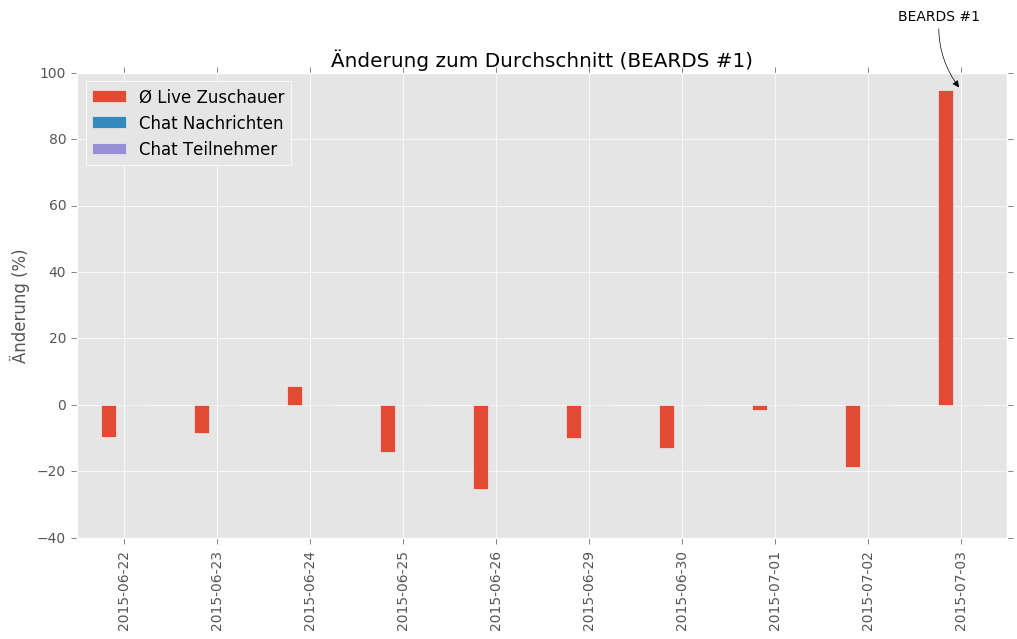

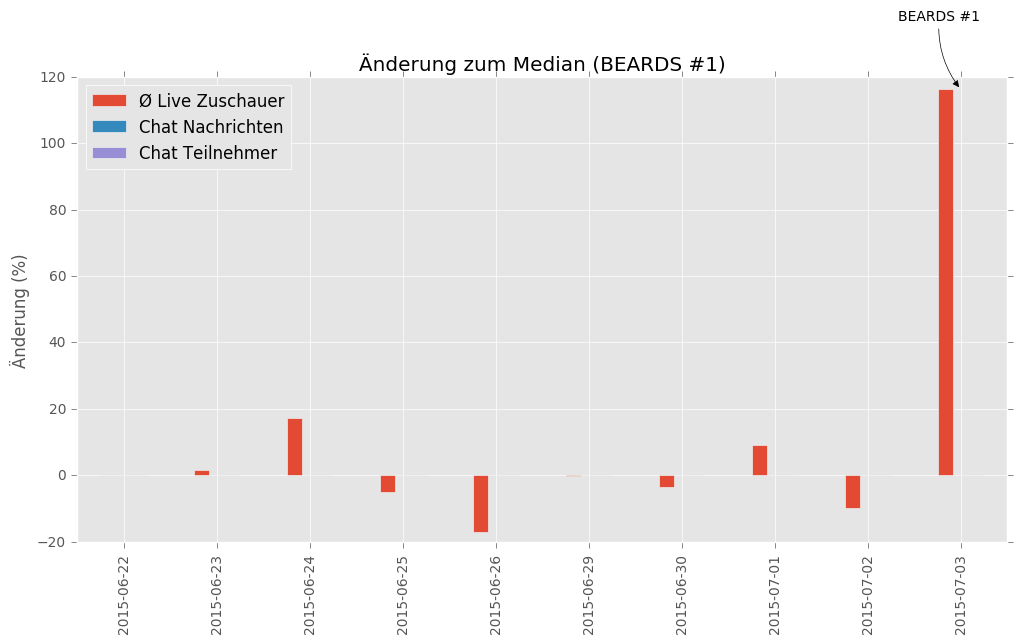


BEARDS #2

=== data ===
                viewers  messages  participants
2015-10-12  5156.451389   63946.0        5918.0
2015-10-13  6247.250000   77887.0        8588.0
2015-10-14  5344.723611   51651.0        5534.0
2015-10-15  4533.776389   33510.0        3980.0
2015-10-16  3990.662500   35646.0        4059.0
2015-10-19  4761.101389   55482.0        5727.0
2015-10-20  4356.245833   38729.0        4601.0
2015-10-21  4515.556944   46185.0        4802.0
2015-10-22  4353.573611   35028.0        3881.0
2015-10-23  9453.797222   77492.0       13193.0

=== mean ===
viewers          5271.313889
messages        51555.600000
participants     6028.300000
dtype: float64

=== median ===
viewers          4647.438889
messages        48918.000000
participants     5168.000000
dtype: float64

=== change ===
              viewers   messages  participants
2015-10-12  -2.179011  24.033083     -1.829703
2015-10-13  18.514096  51.073792     42.461390
2015-10-14   1.392627   0.185043     -8.199658
2015-10-1

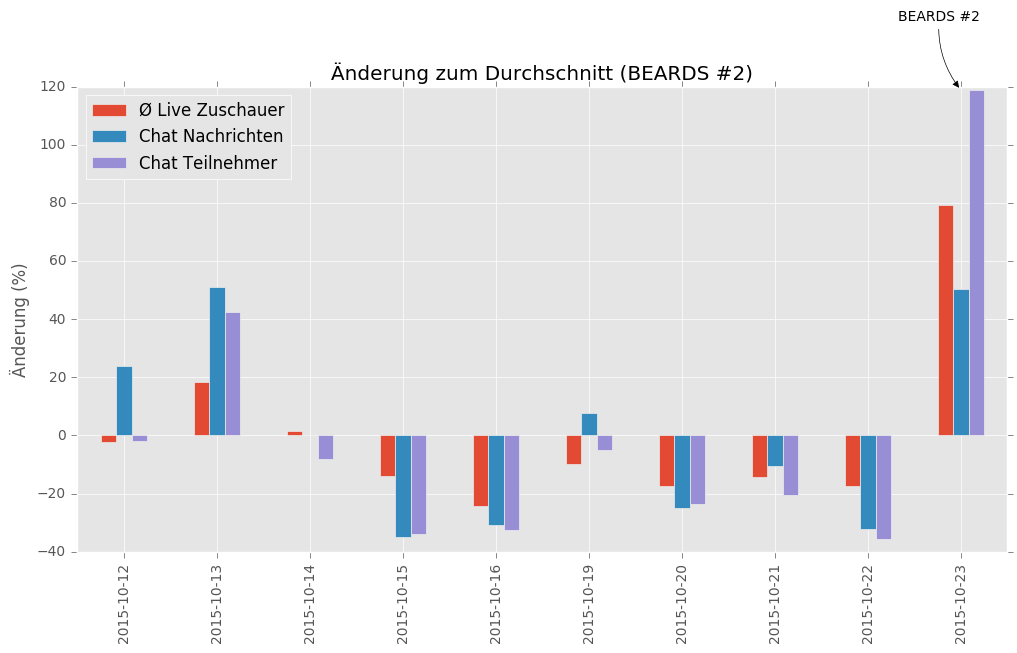

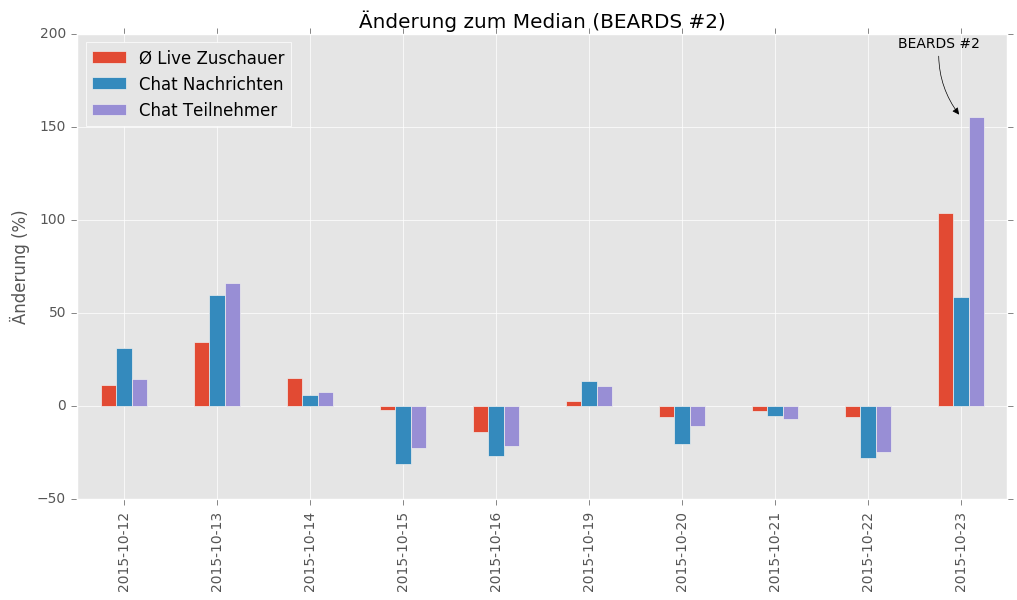


BEARDS #3

=== data ===
                viewers  messages  participants
2016-07-04  2549.724306   29229.0        2862.0
2016-07-05  3767.026389   28304.0        3101.0
2016-07-06  2988.547222   34271.0        3417.0
2016-07-07  2363.434028   25028.0        2183.0
2016-07-08  2404.811111   27541.0        2565.0
2016-07-11  3657.065972   46379.0        5141.0
2016-07-12  3942.909722   54436.0        6057.0
2016-07-13  3704.577083   48054.0        4706.0
2016-07-14  3339.904795   30612.0        3118.0
2016-07-15  8381.820139  114657.0       12983.0

=== mean ===
viewers          3709.982077
messages        43851.100000
participants     4613.300000
dtype: float64

=== median ===
viewers          3498.485384
messages        32441.500000
participants     3267.500000
dtype: float64

=== change ===
               viewers    messages  participants
2016-07-04  -31.273945  -33.344888    -37.961979
2016-07-05    1.537590  -35.454299    -32.781306
2016-07-06  -19.445777  -21.846886    -25.931546
2

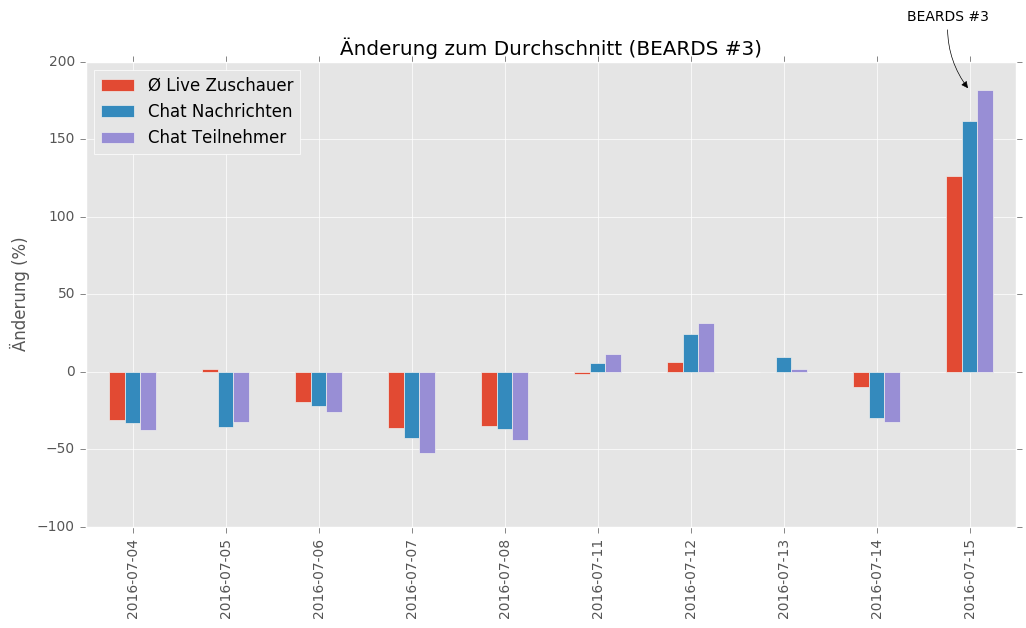

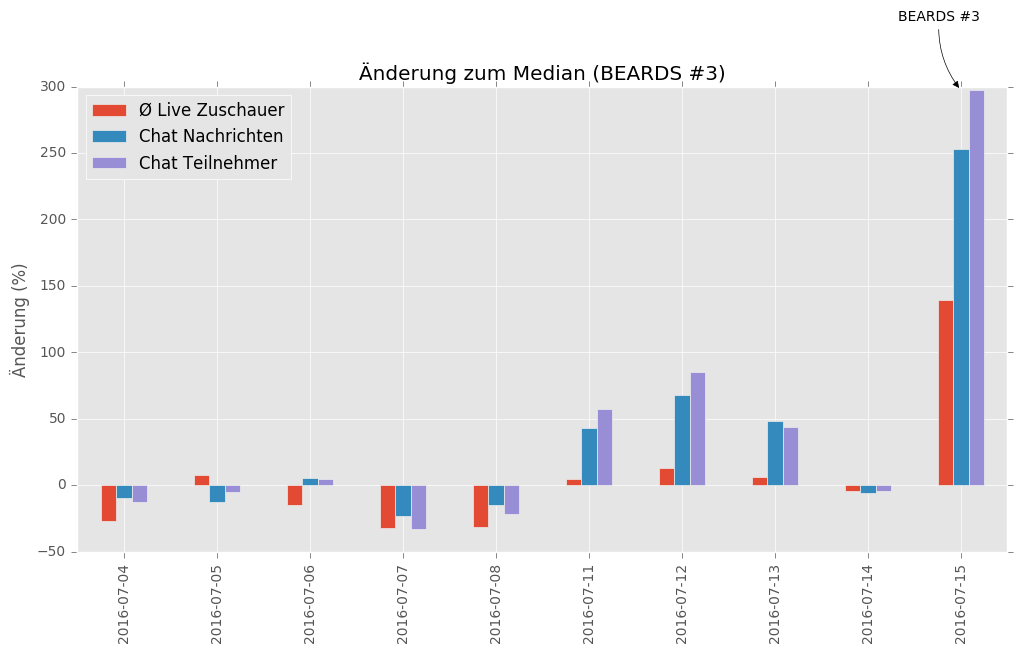


BEARDS #4

=== data ===
                viewers  messages  participants
2016-09-26  2483.983333   21443.0        2568.0
2016-09-27  2632.225000   39320.0        4574.0
2016-09-28  2492.128472   30331.0        2938.0
2016-09-29  2530.177778   21853.0        2236.0
2016-09-30  2778.894444   31231.0        3134.0
2016-10-03  1626.927778   10234.0         957.0
2016-10-04  2515.449769   35754.0        3847.0
2016-10-05  2629.944444   30296.0        2918.0
2016-10-06  2741.988889   25353.0        2542.0
2016-10-07  6141.200000   54188.0        8233.0

=== mean ===
viewers          2857.291991
messages        30000.300000
participants     3394.700000
dtype: float64

=== median ===
viewers          2580.061111
messages        30313.500000
participants     2928.000000
dtype: float64

=== change ===
               viewers   messages  participants
2016-09-26  -13.065121 -28.524048    -24.352667
2016-09-27   -7.876934  31.065356     34.739447
2016-09-28  -12.780056   1.102322    -13.453324
2016-

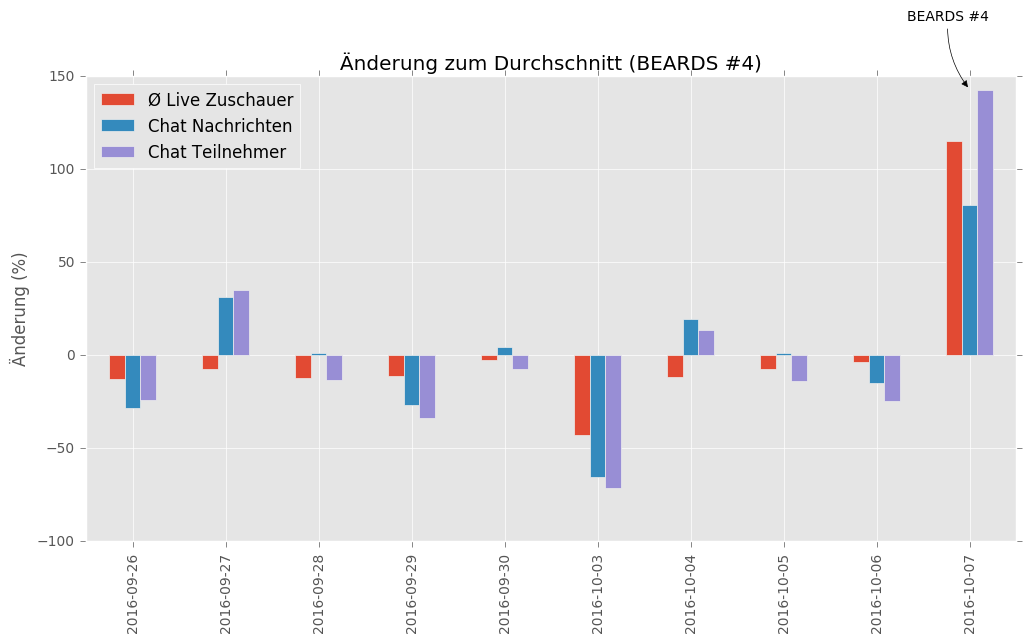

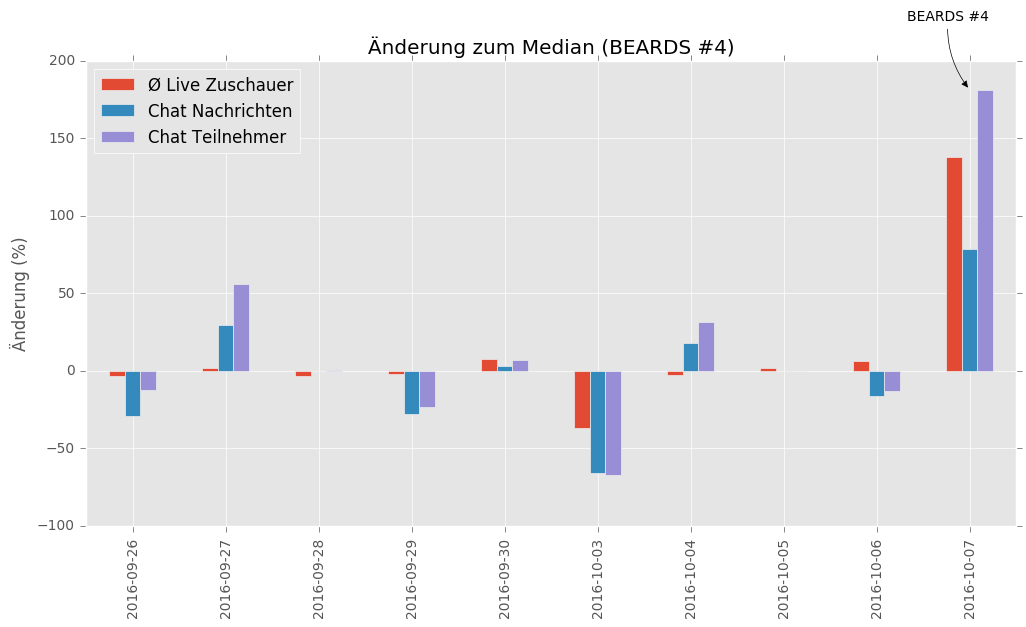

In [8]:
shows = [{
    'name': 'BEARDS #1',
    'date': datetime.datetime(2015, 7, 3)
}, {
    'name': 'BEARDS #2',
    'date': datetime.datetime(2015, 10, 23)
}, {
    'name': 'BEARDS #3',
    'date': datetime.datetime(2016, 7, 15)
}, {
    'name': 'BEARDS #4',
    'date': datetime.datetime(2016, 10, 7)
}]
spanLeft = 1
spanRight = 0
comparison = ComparisonType.week_no_weekend

#join data
joinedData = liveMean.join(chatMessages).join(chatParticipants)

#create additional columns
joinedData['weekday'] = joinedData.index.dayofweek

for show in shows:
    #filter by date
    startDay = show['date'] + datetime.timedelta(days=-show['date'].weekday(), weeks=-spanLeft)
    endDay = show['date'] + datetime.timedelta(days=6 - show['date'].weekday(), weeks=spanRight)
    joinedDataFiltered = joinedData.loc[startDay : endDay]

    #filter by comparison type
    if comparison == ComparisonType.week:
        #no additional filter necessary
        pass
    elif comparison == ComparisonType.week_no_weekend:
        workingDays = range(0,5)
        joinedDataFiltered = joinedDataFiltered[joinedDataFiltered['weekday'].isin(workingDays)]
    elif comparison == ComparisonType.weekday:
        joinedDataFiltered = joinedDataFiltered[joinedDataFiltered['weekday'] == show['date'].weekday()]

        #adjust data type
    joinedDataFiltered = joinedDataFiltered.set_index(joinedDataFiltered.index.date)

    #remove columns
    joinedDataFiltered.drop('weekday', axis=1, inplace=True)

    #calculate mean
    joinedDataMean = joinedDataFiltered.mean()

    #calculate median
    joinedDataMedian = joinedDataFiltered.median()

    #calculate change (mean)
    joinedDataChangeMean = 100 * ((joinedDataFiltered / joinedDataMean) - 1)

    #calculate change (median)
    joinedDataChangeMedian = 100 * ((joinedDataFiltered / joinedDataMedian) - 1)

    #output
    print('\n====================================================')
    print(show['name'])
    print('\n=== data ===')
    print(joinedDataFiltered)
    print('\n=== mean ===')
    print(joinedDataMean)
    print('\n=== median ===')
    print(joinedDataMedian)
    print('\n=== change ===')
    print(joinedDataChangeMean)

    #change (mean)
    plot = joinedDataChangeMean.plot(kind='bar', figsize=(12, 6), title='Änderung zum Durchschnitt (%s)' % show['name'])
    plot.set_xlabel('')
    plot.set_ylabel('Änderung (%)')

    date = show['date'].date()
    datapoint = joinedDataChangeMean.loc[date]
    x = joinedDataChangeMean.index.get_loc(date)
    y = datapoint.max()
    xText = 5 * len(show['name'])
    plot.annotate(show['name'], 
                  xy=(x, y), xycoords='data', 
                  xytext=(-xText, 50), textcoords='offset points',
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle='arc3,rad=0.2',
                                  linewidth = 0.5,
                                  color = 'black'))

    legend = plot.legend(loc=0)
    legend.get_texts()[0].set_text('Ø Live Zuschauer')
    legend.get_texts()[1].set_text('Chat Nachrichten')
    legend.get_texts()[2].set_text('Chat Teilnehmer')

    plt.show()
    
    #change (median)
    plot = joinedDataChangeMedian.plot(kind='bar', figsize=(12, 6), title='Änderung zum Median (%s)' % show['name'])
    plot.set_xlabel('')
    plot.set_ylabel('Änderung (%)')

    date = show['date'].date()
    datapoint = joinedDataChangeMedian.loc[date]
    x = joinedDataChangeMedian.index.get_loc(date)
    y = datapoint.max()
    xText = 5 * len(show['name'])
    plot.annotate(show['name'], 
                  xy=(x, y), xycoords='data', 
                  xytext=(-xText, 50), textcoords='offset points',
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle='arc3,rad=0.2',
                                  linewidth = 0.5,
                                  color = 'black'))

    legend = plot.legend(loc=0)
    legend.get_texts()[0].set_text('Ø Live Zuschauer')
    legend.get_texts()[1].set_text('Chat Nachrichten')
    legend.get_texts()[2].set_text('Chat Teilnehmer')

    plt.show()